##### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import pingouin as pg

#### Read the csv and save it as a variable

In [2]:
data = pd.read_csv("Airlinesatisfaction.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data = data.drop(columns = ["Unnamed: 0", "id"])

In [5]:
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

In [6]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,3,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,3,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,3,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### Get z values

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
z_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [8]:
corr_data = data.corr()
print(corr_data["Arrival Delay in Minutes"])

Gender                              -0.000396
Customer Type                       -0.004747
Age                                 -0.012147
Type of Travel                       0.005683
Class                               -0.013674
Flight Distance                     -0.002426
Inflight wifi service               -0.019095
Departure/Arrival time convenient   -0.000864
Ease of Online booking              -0.007984
Gate location                        0.005143
Food and drink                      -0.032524
Online boarding                     -0.021949
Seat comfort                        -0.029900
Inflight entertainment              -0.030703
On-board service                    -0.035227
Leg room service                     0.011843
Baggage handling                    -0.008542
Checkin service                     -0.020369
Inflight service                    -0.059196
Cleanliness                         -0.015774
Departure Delay in Minutes           0.965481
Arrival Delay in Minutes          

In [9]:
corr_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,...,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.000396,-0.012211
Customer Type,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,-0.006078,...,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,-0.004747,0.187638
Age,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,-0.001330,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,0.137167
Type of Travel,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,0.030700,...,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005432,0.005683,0.449000
Class,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,0.004150,...,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.009637,-0.013674,0.494471
Flight Distance,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,0.004793,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflight wifi service,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,0.336248,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrival time convenient,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,0.444757,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601
Ease of Online booking,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,0.458655,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,0.171705
Gate location,-0.000333,-0.006078,-0.001330,0.030700,0.004150,0.004793,0.336248,0.444757,0.458655,1.000000,...,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143,0.000682


Voor het vergelijken van arrival delay aan de hand van variabelen kan je liear regression van Pingouin gebruiken. Dit maakt de data overzichtelijk en afleesbaar 

In [10]:
data.dropna(inplace=True)
'''Pingouin gebruiken vanwege overzicht'''
lm = pg.linear_regression(data[['Flight Distance', 'Departure Delay in Minutes','Age']], data['Arrival Delay in Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.11,0.09,11.88,0.00,0.93,0.93,0.92,1.29
1,Flight Distance,-0.00,0.00,-5.01,0.00,0.93,0.93,-0.00,-0.00
2,Departure Delay in Minutes,0.98,0.00,1193.11,0.00,0.93,0.93,0.98,0.98
3,Age,-0.00,0.00,-2.39,0.02,0.93,0.93,-0.01,-0.00


In [11]:
z_data.dropna(inplace=True)
lm = pg.linear_regression(z_data[['Flight Distance', 'Departure Delay in Minutes','Age']], z_data['Arrival Delay in Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.00,0.0,2.12,0.03,0.93,0.93,0.00,0.00
1,Flight Distance,-0.00,0.0,-5.01,0.00,0.93,0.93,-0.01,-0.00
2,Departure Delay in Minutes,0.97,0.0,1193.11,0.00,0.93,0.93,0.97,0.97
3,Age,-0.00,0.0,-2.39,0.02,0.93,0.93,-0.00,-0.00


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

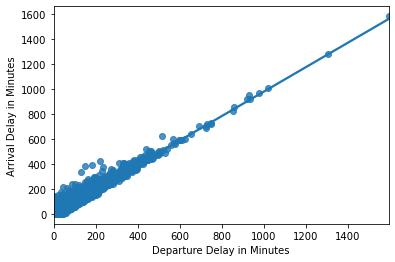

In [12]:
sns.regplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", data=data)

Aan de hand van de liniarie progressie kan je voorspellen wat de correlatie is tussen Departure delay en Arrival Delay. Een tabel is handig voor het snel aflezen.